In [1]:
import tensorflow as tf
import keras
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# YOLO model import (ultralytics)
from ultralytics import YOLO

# Load YOLOv8 model pre-trained on COCO dataset
yolo_model = YOLO('yolov8n.pt')  # You can replace with other YOLOv8 variants if needed

def load_and_preprocess_images(directory, target_size=(224, 224)):
    X, y = [], []
    class_folders = os.listdir(directory)
    class_folders.sort()  # Ensure consistent class order

    for class_index, class_folder in enumerate(class_folders):
        class_path = os.path.join(directory, class_folder)
        if os.path.isdir(class_path):
            for image_file in os.listdir(class_path):
                image_path = os.path.join(class_path, image_file)
                try:
                    image = cv2.imread(image_path)
                    image = cv2.resize(image, target_size)
                    X.append(image)
                    y.append(class_index)
                except Exception as e:
                    print(f"Error loading {image_path}: {e}")
    
    X = np.array(X)
    y = np.array(y)
    return X, y

# Load and preprocess images
path = "archive/Training"
X, y = load_and_preprocess_images(path)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a simple CNN model
def create_cnn(input_shape, num_classes):
    inputs = Input(shape=input_shape)
    x = Conv2D(32, (3, 3), activation='relu')(inputs)
    x = MaxPooling2D((2, 2))(x)
    x = Conv2D(64, (3, 3), activation='relu')(x)
    x = MaxPooling2D((2, 2))(x)
    x = Flatten()(x)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.5)(x)
    outputs = Dense(num_classes, activation='softmax')(x)
    model = Model(inputs, outputs)
    return model

2024-10-18 23:59:48.592661: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# Create and compile the CNN model
cnn_model = create_cnn((224, 224, 3), len(os.listdir(path)))
cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [3]:
# Train the CNN model
cnn_model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10


2024-10-19 00:00:21.524181: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 687762432 exceeds 10% of free system memory.
2024-10-19 00:00:23.848482: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 201867264 exceeds 10% of free system memory.


  1/143 ━━━━━━━━━━━━━━━━━━━━ 6:36 3s/step - accuracy: 0.2500 - loss: 22.7023

2024-10-19 00:00:24.520988: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 201867264 exceeds 10% of free system memory.
2024-10-19 00:00:24.702808: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 201867264 exceeds 10% of free system memory.


  2/143 ━━━━━━━━━━━━━━━━━━━━ 1:37 695ms/step - accuracy: 0.2734 - loss: 448.2847

2024-10-19 00:00:25.210674: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 201867264 exceeds 10% of free system memory.


143/143 ━━━━━━━━━━━━━━━━━━━━ 108s 739ms/step - accuracy: 0.5930 - loss: 113.4930 - val_accuracy: 0.7822 - val_loss: 0.5856
Epoch 2/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 108s 757ms/step - accuracy: 0.8649 - loss: 0.4248 - val_accuracy: 0.8801 - val_loss: 0.3939
Epoch 3/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 110s 767ms/step - accuracy: 0.9307 - loss: 0.2414 - val_accuracy: 0.8994 - val_loss: 0.3159
Epoch 4/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 108s 757ms/step - accuracy: 0.9594 - loss: 0.1435 - val_accuracy: 0.9055 - val_loss: 0.2985
Epoch 5/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 107s 747ms/step - accuracy: 0.9633 - loss: 0.1037 - val_accuracy: 0.9073 - val_loss: 0.3084
Epoch 6/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 107s 745ms/step - accuracy: 0.9667 - loss: 0.1245 - val_accuracy: 0.9064 - val_loss: 0.3497
Epoch 7/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 107s 750ms/step - accuracy: 0.9748 - loss: 0.0863 - val_accuracy: 0.9116 - val_loss: 0.3341
Epoch 8/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 111s 773ms/step - accuracy: 0.9715 - loss: 0.

In [4]:
# Use YOLO for object detection on test images
for img_path in os.listdir('archive/Testing'):
    img_full_path = os.path.join('archive/Testing', img_path)
    yolo_model.predict(img_full_path, save=True, show=False)  # Set `show=False` to prevent display


image 1/300 /home/sulman/Downloads/archive/Testing/glioma/Te-glTr_0000.jpg: 640x640 1 bowl, 9.4ms
image 2/300 /home/sulman/Downloads/archive/Testing/glioma/Te-glTr_0001.jpg: 640x640 1 vase, 15.2ms
image 3/300 /home/sulman/Downloads/archive/Testing/glioma/Te-glTr_0002.jpg: 640x640 (no detections), 6.5ms
image 4/300 /home/sulman/Downloads/archive/Testing/glioma/Te-glTr_0003.jpg: 640x640 (no detections), 5.9ms
image 5/300 /home/sulman/Downloads/archive/Testing/glioma/Te-glTr_0004.jpg: 640x640 (no detections), 6.8ms
image 6/300 /home/sulman/Downloads/archive/Testing/glioma/Te-glTr_0005.jpg: 640x640 1 bowl, 1 vase, 5.5ms
image 7/300 /home/sulman/Downloads/archive/Testing/glioma/Te-glTr_0006.jpg: 640x640 1 bowl, 8.6ms
image 8/300 /home/sulman/Downloads/archive/Testing/glioma/Te-glTr_0007.jpg: 640x640 1 vase, 5.6ms
image 9/300 /home/sulman/Downloads/archive/Testing/glioma/Te-glTr_0008.jpg: 640x640 1 vase, 5.5ms
image 10/300 /home/sulman/Downloads/archive/Testing/glioma/Te-glTr_0009.jpg: 640x

image 82/300 /home/sulman/Downloads/archive/Testing/glioma/Te-gl_0081.jpg: 640x640 1 bowl, 1 pizza, 5.2ms
image 83/300 /home/sulman/Downloads/archive/Testing/glioma/Te-gl_0082.jpg: 640x640 (no detections), 5.3ms
image 84/300 /home/sulman/Downloads/archive/Testing/glioma/Te-gl_0083.jpg: 640x640 1 cat, 5.5ms
image 85/300 /home/sulman/Downloads/archive/Testing/glioma/Te-gl_0084.jpg: 640x640 (no detections), 5.4ms
image 86/300 /home/sulman/Downloads/archive/Testing/glioma/Te-gl_0085.jpg: 640x640 1 vase, 5.3ms
image 87/300 /home/sulman/Downloads/archive/Testing/glioma/Te-gl_0086.jpg: 640x640 1 clock, 5.4ms
image 88/300 /home/sulman/Downloads/archive/Testing/glioma/Te-gl_0087.jpg: 640x640 1 clock, 5.4ms
image 89/300 /home/sulman/Downloads/archive/Testing/glioma/Te-gl_0088.jpg: 640x640 1 vase, 5.2ms
image 90/300 /home/sulman/Downloads/archive/Testing/glioma/Te-gl_0089.jpg: 640x640 1 dog, 6.1ms
image 91/300 /home/sulman/Downloads/archive/Testing/glioma/Te-gl_0090.jpg: 640x640 1 bowl, 1 vase, 5

image 163/300 /home/sulman/Downloads/archive/Testing/glioma/Te-gl_0162.jpg: 640x640 1 cat, 5.4ms
image 164/300 /home/sulman/Downloads/archive/Testing/glioma/Te-gl_0163.jpg: 640x640 1 cat, 5.3ms
image 165/300 /home/sulman/Downloads/archive/Testing/glioma/Te-gl_0164.jpg: 640x640 (no detections), 5.3ms
image 166/300 /home/sulman/Downloads/archive/Testing/glioma/Te-gl_0165.jpg: 640x640 1 person, 5.4ms
image 167/300 /home/sulman/Downloads/archive/Testing/glioma/Te-gl_0166.jpg: 640x640 (no detections), 5.5ms
image 168/300 /home/sulman/Downloads/archive/Testing/glioma/Te-gl_0167.jpg: 640x640 (no detections), 5.9ms
image 169/300 /home/sulman/Downloads/archive/Testing/glioma/Te-gl_0168.jpg: 640x640 (no detections), 5.3ms
image 170/300 /home/sulman/Downloads/archive/Testing/glioma/Te-gl_0169.jpg: 640x640 (no detections), 5.4ms
image 171/300 /home/sulman/Downloads/archive/Testing/glioma/Te-gl_0170.jpg: 640x640 (no detections), 5.3ms
image 172/300 /home/sulman/Downloads/archive/Testing/glioma/Te-g

image 242/300 /home/sulman/Downloads/archive/Testing/glioma/Te-gl_0241.jpg: 640x640 (no detections), 5.3ms
image 243/300 /home/sulman/Downloads/archive/Testing/glioma/Te-gl_0242.jpg: 640x640 (no detections), 5.3ms
image 244/300 /home/sulman/Downloads/archive/Testing/glioma/Te-gl_0243.jpg: 640x640 (no detections), 5.3ms
image 245/300 /home/sulman/Downloads/archive/Testing/glioma/Te-gl_0244.jpg: 640x640 (no detections), 5.5ms
image 246/300 /home/sulman/Downloads/archive/Testing/glioma/Te-gl_0245.jpg: 640x640 1 person, 5.5ms
image 247/300 /home/sulman/Downloads/archive/Testing/glioma/Te-gl_0246.jpg: 640x640 (no detections), 5.4ms
image 248/300 /home/sulman/Downloads/archive/Testing/glioma/Te-gl_0247.jpg: 640x640 1 person, 9.5ms
image 249/300 /home/sulman/Downloads/archive/Testing/glioma/Te-gl_0248.jpg: 640x640 (no detections), 6.0ms
image 250/300 /home/sulman/Downloads/archive/Testing/glioma/Te-gl_0249.jpg: 640x640 (no detections), 6.3ms
image 251/300 /home/sulman/Downloads/archive/Testin

image 19/306 /home/sulman/Downloads/archive/Testing/meningioma/Te-me_0018.jpg: 640x512 1 vase, 31.0ms
image 20/306 /home/sulman/Downloads/archive/Testing/meningioma/Te-me_0019.jpg: 640x576 (no detections), 6.0ms
image 21/306 /home/sulman/Downloads/archive/Testing/meningioma/Te-me_0020.jpg: 640x640 (no detections), 5.8ms
image 22/306 /home/sulman/Downloads/archive/Testing/meningioma/Te-me_0021.jpg: 640x640 (no detections), 5.4ms
image 23/306 /home/sulman/Downloads/archive/Testing/meningioma/Te-me_0022.jpg: 640x640 (no detections), 5.9ms
image 24/306 /home/sulman/Downloads/archive/Testing/meningioma/Te-me_0023.jpg: 640x576 (no detections), 6.1ms
image 25/306 /home/sulman/Downloads/archive/Testing/meningioma/Te-me_0024.jpg: 448x640 (no detections), 35.2ms
image 26/306 /home/sulman/Downloads/archive/Testing/meningioma/Te-me_0025.jpg: 640x576 (no detections), 6.2ms
image 27/306 /home/sulman/Downloads/archive/Testing/meningioma/Te-me_0026.jpg: 640x640 (no detections), 6.3ms
image 28/306 /hom

image 96/306 /home/sulman/Downloads/archive/Testing/meningioma/Te-me_0095.jpg: 640x640 (no detections), 5.3ms
image 97/306 /home/sulman/Downloads/archive/Testing/meningioma/Te-me_0096.jpg: 640x640 1 vase, 5.4ms
image 98/306 /home/sulman/Downloads/archive/Testing/meningioma/Te-me_0097.jpg: 640x576 (no detections), 5.7ms
image 99/306 /home/sulman/Downloads/archive/Testing/meningioma/Te-me_0098.jpg: 640x576 (no detections), 6.0ms
image 100/306 /home/sulman/Downloads/archive/Testing/meningioma/Te-me_0099.jpg: 640x576 1 vase, 5.2ms
image 101/306 /home/sulman/Downloads/archive/Testing/meningioma/Te-me_0100.jpg: 640x576 1 vase, 5.3ms
image 102/306 /home/sulman/Downloads/archive/Testing/meningioma/Te-me_0101.jpg: 640x608 (no detections), 5.6ms
image 103/306 /home/sulman/Downloads/archive/Testing/meningioma/Te-me_0102.jpg: 640x640 2 clocks, 6.0ms
image 104/306 /home/sulman/Downloads/archive/Testing/meningioma/Te-me_0103.jpg: 640x576 1 person, 5.5ms
image 105/306 /home/sulman/Downloads/archive/T

image 173/306 /home/sulman/Downloads/archive/Testing/meningioma/Te-me_0172.jpg: 640x640 1 bird, 5.2ms
image 174/306 /home/sulman/Downloads/archive/Testing/meningioma/Te-me_0173.jpg: 640x640 (no detections), 5.4ms
image 175/306 /home/sulman/Downloads/archive/Testing/meningioma/Te-me_0174.jpg: 640x640 1 vase, 5.2ms
image 176/306 /home/sulman/Downloads/archive/Testing/meningioma/Te-me_0175.jpg: 640x640 (no detections), 5.2ms
image 177/306 /home/sulman/Downloads/archive/Testing/meningioma/Te-me_0176.jpg: 640x640 (no detections), 5.2ms
image 178/306 /home/sulman/Downloads/archive/Testing/meningioma/Te-me_0177.jpg: 640x640 (no detections), 5.4ms
image 179/306 /home/sulman/Downloads/archive/Testing/meningioma/Te-me_0178.jpg: 640x640 1 clock, 5.3ms
image 180/306 /home/sulman/Downloads/archive/Testing/meningioma/Te-me_0179.jpg: 640x640 2 clocks, 5.4ms
image 181/306 /home/sulman/Downloads/archive/Testing/meningioma/Te-me_0180.jpg: 640x640 (no detections), 5.3ms
image 182/306 /home/sulman/Downloa

image 249/306 /home/sulman/Downloads/archive/Testing/meningioma/Te-me_0248.jpg: 640x640 (no detections), 5.1ms
image 250/306 /home/sulman/Downloads/archive/Testing/meningioma/Te-me_0249.jpg: 640x640 (no detections), 5.1ms
image 251/306 /home/sulman/Downloads/archive/Testing/meningioma/Te-me_0250.jpg: 640x640 (no detections), 5.1ms
image 252/306 /home/sulman/Downloads/archive/Testing/meningioma/Te-me_0251.jpg: 640x640 (no detections), 5.2ms
image 253/306 /home/sulman/Downloads/archive/Testing/meningioma/Te-me_0252.jpg: 640x640 (no detections), 5.1ms
image 254/306 /home/sulman/Downloads/archive/Testing/meningioma/Te-me_0253.jpg: 640x640 (no detections), 5.0ms
image 255/306 /home/sulman/Downloads/archive/Testing/meningioma/Te-me_0254.jpg: 640x640 (no detections), 5.1ms
image 256/306 /home/sulman/Downloads/archive/Testing/meningioma/Te-me_0255.jpg: 640x640 (no detections), 5.0ms
image 257/306 /home/sulman/Downloads/archive/Testing/meningioma/Te-me_0256.jpg: 640x640 1 dog, 5.0ms
image 258/3

image 18/405 /home/sulman/Downloads/archive/Testing/notumor/Te-no_0017.jpg: 640x576 (no detections), 5.7ms
image 19/405 /home/sulman/Downloads/archive/Testing/notumor/Te-no_0018.jpg: 640x640 1 vase, 5.8ms
image 20/405 /home/sulman/Downloads/archive/Testing/notumor/Te-no_0019.jpg: 640x576 (no detections), 5.7ms
image 21/405 /home/sulman/Downloads/archive/Testing/notumor/Te-no_0020.jpg: 640x640 1 pizza, 5.7ms
image 22/405 /home/sulman/Downloads/archive/Testing/notumor/Te-no_0021.jpg: 640x640 (no detections), 5.2ms
image 23/405 /home/sulman/Downloads/archive/Testing/notumor/Te-no_0022.jpg: 640x544 1 bowl, 5.7ms
image 24/405 /home/sulman/Downloads/archive/Testing/notumor/Te-no_0023.jpg: 640x640 (no detections), 5.6ms
image 25/405 /home/sulman/Downloads/archive/Testing/notumor/Te-no_0024.jpg: 640x576 (no detections), 5.8ms
image 26/405 /home/sulman/Downloads/archive/Testing/notumor/Te-no_0025.jpg: 640x640 (no detections), 6.4ms
image 27/405 /home/sulman/Downloads/archive/Testing/notumor/Te-

image 98/405 /home/sulman/Downloads/archive/Testing/notumor/Te-no_0097.jpg: 640x640 (no detections), 6.6ms
image 99/405 /home/sulman/Downloads/archive/Testing/notumor/Te-no_0098.jpg: 640x640 (no detections), 5.7ms
image 100/405 /home/sulman/Downloads/archive/Testing/notumor/Te-no_0099.jpg: 576x640 1 vase, 8.8ms
image 101/405 /home/sulman/Downloads/archive/Testing/notumor/Te-no_0100.jpg: 640x576 (no detections), 9.2ms
image 102/405 /home/sulman/Downloads/archive/Testing/notumor/Te-no_0101.jpg: 640x608 (no detections), 6.2ms
image 103/405 /home/sulman/Downloads/archive/Testing/notumor/Te-no_0102.jpg: 640x576 1 dog, 7.4ms
image 104/405 /home/sulman/Downloads/archive/Testing/notumor/Te-no_0103.jpg: 640x576 (no detections), 5.9ms
image 105/405 /home/sulman/Downloads/archive/Testing/notumor/Te-no_0104.jpg: 640x608 1 bowl, 6.4ms
image 106/405 /home/sulman/Downloads/archive/Testing/notumor/Te-no_0105.jpg: 480x640 1 clock, 32.5ms
image 107/405 /home/sulman/Downloads/archive/Testing/notumor/Te-n

image 178/405 /home/sulman/Downloads/archive/Testing/notumor/Te-no_0177.jpg: 640x544 1 person, 5.8ms
image 179/405 /home/sulman/Downloads/archive/Testing/notumor/Te-no_0178.jpg: 640x640 (no detections), 5.7ms
image 180/405 /home/sulman/Downloads/archive/Testing/notumor/Te-no_0179.jpg: 640x640 (no detections), 5.2ms
image 181/405 /home/sulman/Downloads/archive/Testing/notumor/Te-no_0180.jpg: 608x640 1 vase, 6.0ms
image 182/405 /home/sulman/Downloads/archive/Testing/notumor/Te-no_0181.jpg: 448x640 1 vase, 5.8ms
image 183/405 /home/sulman/Downloads/archive/Testing/notumor/Te-no_0182.jpg: 640x608 1 vase, 5.7ms
image 184/405 /home/sulman/Downloads/archive/Testing/notumor/Te-no_0183.jpg: 384x640 1 clock, 7.7ms
image 185/405 /home/sulman/Downloads/archive/Testing/notumor/Te-no_0184.jpg: 448x640 1 vase, 6.0ms
image 186/405 /home/sulman/Downloads/archive/Testing/notumor/Te-no_0185.jpg: 640x640 (no detections), 5.7ms
image 187/405 /home/sulman/Downloads/archive/Testing/notumor/Te-no_0186.jpg: 64

image 257/405 /home/sulman/Downloads/archive/Testing/notumor/Te-no_0256.jpg: 640x640 (no detections), 6.0ms
image 258/405 /home/sulman/Downloads/archive/Testing/notumor/Te-no_0257.jpg: 640x608 (no detections), 5.5ms
image 259/405 /home/sulman/Downloads/archive/Testing/notumor/Te-no_0258.jpg: 640x640 1 vase, 5.6ms
image 260/405 /home/sulman/Downloads/archive/Testing/notumor/Te-no_0259.jpg: 640x640 1 vase, 5.1ms
image 261/405 /home/sulman/Downloads/archive/Testing/notumor/Te-no_0260.jpg: 608x640 (no detections), 5.4ms
image 262/405 /home/sulman/Downloads/archive/Testing/notumor/Te-no_0261.jpg: 640x576 (no detections), 5.8ms
image 263/405 /home/sulman/Downloads/archive/Testing/notumor/Te-no_0262.jpg: 640x544 1 person, 5.8ms
image 264/405 /home/sulman/Downloads/archive/Testing/notumor/Te-no_0263.jpg: 640x640 1 vase, 7.1ms
image 265/405 /home/sulman/Downloads/archive/Testing/notumor/Te-no_0264.jpg: 640x640 1 vase, 5.4ms
image 266/405 /home/sulman/Downloads/archive/Testing/notumor/Te-no_0265

image 337/405 /home/sulman/Downloads/archive/Testing/notumor/Te-no_0336.jpg: 640x576 1 bird, 1 vase, 5.8ms
image 338/405 /home/sulman/Downloads/archive/Testing/notumor/Te-no_0337.jpg: 640x512 (no detections), 5.9ms
image 339/405 /home/sulman/Downloads/archive/Testing/notumor/Te-no_0338.jpg: 640x608 (no detections), 5.9ms
image 340/405 /home/sulman/Downloads/archive/Testing/notumor/Te-no_0339.jpg: 640x640 (no detections), 5.7ms
image 341/405 /home/sulman/Downloads/archive/Testing/notumor/Te-no_0340.jpg: 640x512 1 person, 5.7ms
image 342/405 /home/sulman/Downloads/archive/Testing/notumor/Te-no_0341.jpg: 640x640 1 vase, 5.7ms
image 343/405 /home/sulman/Downloads/archive/Testing/notumor/Te-no_0342.jpg: 640x480 1 dog, 5.8ms
image 344/405 /home/sulman/Downloads/archive/Testing/notumor/Te-no_0343.jpg: 640x640 1 person, 5.7ms
image 345/405 /home/sulman/Downloads/archive/Testing/notumor/Te-no_0344.jpg: 640x576 1 vase, 5.8ms
image 346/405 /home/sulman/Downloads/archive/Testing/notumor/Te-no_0345

image 10/300 /home/sulman/Downloads/archive/Testing/pituitary/Te-piTr_0009.jpg: 640x640 1 cake, 5.3ms
image 11/300 /home/sulman/Downloads/archive/Testing/pituitary/Te-pi_0010.jpg: 640x640 (no detections), 5.3ms
image 12/300 /home/sulman/Downloads/archive/Testing/pituitary/Te-pi_0011.jpg: 640x640 (no detections), 5.3ms
image 13/300 /home/sulman/Downloads/archive/Testing/pituitary/Te-pi_0012.jpg: 640x640 1 person, 5.3ms
image 14/300 /home/sulman/Downloads/archive/Testing/pituitary/Te-pi_0013.jpg: 640x640 1 vase, 5.4ms
image 15/300 /home/sulman/Downloads/archive/Testing/pituitary/Te-pi_0014.jpg: 640x640 (no detections), 5.4ms
image 16/300 /home/sulman/Downloads/archive/Testing/pituitary/Te-pi_0015.jpg: 640x640 1 bowl, 5.3ms
image 17/300 /home/sulman/Downloads/archive/Testing/pituitary/Te-pi_0016.jpg: 640x640 (no detections), 5.3ms
image 18/300 /home/sulman/Downloads/archive/Testing/pituitary/Te-pi_0017.jpg: 640x640 (no detections), 5.3ms
image 19/300 /home/sulman/Downloads/archive/Testing

image 88/300 /home/sulman/Downloads/archive/Testing/pituitary/Te-pi_0087.jpg: 640x640 (no detections), 5.2ms
image 89/300 /home/sulman/Downloads/archive/Testing/pituitary/Te-pi_0088.jpg: 640x640 (no detections), 5.1ms
image 90/300 /home/sulman/Downloads/archive/Testing/pituitary/Te-pi_0089.jpg: 640x640 (no detections), 6.3ms
image 91/300 /home/sulman/Downloads/archive/Testing/pituitary/Te-pi_0090.jpg: 640x640 1 bowl, 5.0ms
image 92/300 /home/sulman/Downloads/archive/Testing/pituitary/Te-pi_0091.jpg: 640x640 (no detections), 5.0ms
image 93/300 /home/sulman/Downloads/archive/Testing/pituitary/Te-pi_0092.jpg: 640x640 (no detections), 5.2ms
image 94/300 /home/sulman/Downloads/archive/Testing/pituitary/Te-pi_0093.jpg: 640x640 (no detections), 5.1ms
image 95/300 /home/sulman/Downloads/archive/Testing/pituitary/Te-pi_0094.jpg: 640x640 1 person, 1 horse, 5.1ms
image 96/300 /home/sulman/Downloads/archive/Testing/pituitary/Te-pi_0095.jpg: 640x640 (no detections), 5.1ms
image 97/300 /home/sulman/

image 165/300 /home/sulman/Downloads/archive/Testing/pituitary/Te-pi_0164.jpg: 640x640 1 pizza, 1 cake, 5.4ms
image 166/300 /home/sulman/Downloads/archive/Testing/pituitary/Te-pi_0165.jpg: 640x640 1 bowl, 1 cake, 5.7ms
image 167/300 /home/sulman/Downloads/archive/Testing/pituitary/Te-pi_0166.jpg: 640x640 1 suitcase, 1 vase, 5.5ms
image 168/300 /home/sulman/Downloads/archive/Testing/pituitary/Te-pi_0167.jpg: 640x640 1 person, 1 vase, 5.7ms
image 169/300 /home/sulman/Downloads/archive/Testing/pituitary/Te-pi_0168.jpg: 640x640 (no detections), 22.9ms
image 170/300 /home/sulman/Downloads/archive/Testing/pituitary/Te-pi_0169.jpg: 640x640 1 cake, 5.5ms
image 171/300 /home/sulman/Downloads/archive/Testing/pituitary/Te-pi_0170.jpg: 640x640 (no detections), 5.0ms
image 172/300 /home/sulman/Downloads/archive/Testing/pituitary/Te-pi_0171.jpg: 640x640 1 vase, 5.3ms
image 173/300 /home/sulman/Downloads/archive/Testing/pituitary/Te-pi_0172.jpg: 640x640 (no detections), 5.6ms
image 174/300 /home/sulm

image 242/300 /home/sulman/Downloads/archive/Testing/pituitary/Te-pi_0241.jpg: 640x640 (no detections), 5.6ms
image 243/300 /home/sulman/Downloads/archive/Testing/pituitary/Te-pi_0242.jpg: 640x640 1 clock, 5.1ms
image 244/300 /home/sulman/Downloads/archive/Testing/pituitary/Te-pi_0243.jpg: 640x640 (no detections), 5.0ms
image 245/300 /home/sulman/Downloads/archive/Testing/pituitary/Te-pi_0244.jpg: 640x640 (no detections), 5.5ms
image 246/300 /home/sulman/Downloads/archive/Testing/pituitary/Te-pi_0245.jpg: 640x640 1 bowl, 5.1ms
image 247/300 /home/sulman/Downloads/archive/Testing/pituitary/Te-pi_0246.jpg: 640x640 1 sheep, 5.0ms
image 248/300 /home/sulman/Downloads/archive/Testing/pituitary/Te-pi_0247.jpg: 640x640 (no detections), 5.0ms
image 249/300 /home/sulman/Downloads/archive/Testing/pituitary/Te-pi_0248.jpg: 640x640 (no detections), 5.1ms
image 250/300 /home/sulman/Downloads/archive/Testing/pituitary/Te-pi_0249.jpg: 640x640 1 cat, 5.0ms
image 251/300 /home/sulman/Downloads/archive/

In [5]:
# Evaluate the CNN model
cnn_model.evaluate(X_test, y_test)

# Save the trained CNN model
cnn_model.save('cnn_brain_tumor_model.h5')

36/36 ━━━━━━━━━━━━━━━━━━━━ 6s 166ms/step - accuracy: 0.8988 - loss: 0.3402


In [6]:
# Load your trained CNN model
cnn_model = load_model('cnn_brain_tumor_model.h5')

# Function to preprocess image
def preprocess_image(image):
    image = image.resize((224, 224))  # Resize to match model input
    image = np.array(image)
    image = image / 255.0  # Normalize pixel values
    image = np.expand_dims(image, axis=0)  # Add batch dimension
    return image

# Function to predict tumor presence
def predict_tumor(image):
    processed_image = preprocess_image(image)
    prediction = cnn_model.predict(processed_image)
    predicted_class = np.argmax(prediction, axis=1)
    return "Tumor Detected" if predicted_class == 1 else "No Tumor"

# Function to handle user image input
def handle_user_image_input(image_path):
    try:
        # Open image from user input
        image = Image.open(image_path)
        result = predict_tumor(image)
        print(f"Prediction: {result}")
        return result
    except Exception as e:
        print(f"Error processing image: {e}")
        return None


In [7]:
from fpdf import FPDF

# Function to generate a PDF report
def generate_pdf_report(image_path, prediction):
    pdf = FPDF()
    pdf.add_page()
    
    # Title
    pdf.set_font("Arial", size=16)
    pdf.cell(200, 10, txt="Brain Tumor Detection Report", ln=True, align="C")

    # Add prediction result
    pdf.set_font("Arial", size=12)
    pdf.cell(200, 10, txt=f"Prediction: {prediction}", ln=True, align="L")

    # Insert the image
    pdf.image(image_path, x=10, y=30, w=100)
    
    # Save PDF
    output_path = "tumor_detection_report.pdf"
    pdf.output(output_path)
    print(f"PDF report generated: {output_path}")

# Example usage:
image_path = "Te-me_0026.jpg"  # Replace with the actual image input path
prediction = handle_user_image_input(image_path)
if prediction:
    generate_pdf_report(image_path, prediction)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Prediction: No Tumor
PDF report generated: tumor_detection_report.pdf


In [8]:
# Load YOLOv8 model pre-trained on COCO dataset
yolo_model = YOLO('yolov8n.pt')  # You can replace with other YOLOv8 variants if needed

# Load your trained CNN model
cnn_model = tf.keras.models.load_model('cnn_brain_tumor_model.h5')

# Function to preprocess image for CNN
def preprocess_image(image):
    image = image.resize((224, 224))  # Resize to match model input
    image = np.array(image)
    image = image / 255.0  # Normalize pixel values
    image = np.expand_dims(image, axis=0)  # Add batch dimension
    return image

# Function to predict tumor presence using CNN
def predict_tumor(image):
    processed_image = preprocess_image(image)
    prediction = cnn_model.predict(processed_image)
    predicted_class = np.argmax(prediction, axis=1)
    return "Tumor Detected" if predicted_class == 1 else "No Tumor"

# Function to detect tumor using YOLO and draw bounding box
def detect_and_draw_bounding_box(image_path):
    """
    Use YOLO to detect tumor and draw bounding box on the image.
    """
    results = yolo_model.predict(image_path, save=False, show=False)
    image = cv2.imread(image_path)
    boxes = results[0].boxes  # Assuming results[0] has the detected boxes

    if boxes:  # Check if any boxes are detected
        for box in boxes:
            x1, y1, x2, y2 = box.xyxy[0].numpy().astype(int)
            cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
        return image, True  # Return the image with bounding box and detection status
    else:
        return image, False  # Return the original image and detection status

# Function to handle user image input
def handle_user_image_input(image_path):
    try:
        # Open image from user input
        image = Image.open(image_path)
        result = predict_tumor(image)
        print(f"Prediction: {result}")
        return result
    except Exception as e:
        print(f"Error processing image: {e}")
        return None

# Function to generate a PDF report
def generate_pdf_report(image_path, prediction, image_with_box=None):
    pdf = FPDF()
    pdf.add_page()
    
    # Title
    pdf.set_font("Arial", size=16)
    pdf.cell(200, 10, txt="Brain Tumor Detection Report", ln=True, align="C")

    # Add prediction result
    pdf.set_font("Arial", size=12)
    pdf.cell(200, 10, txt=f"Prediction: {prediction}", ln=True, align="L")

    # Insert the image with bounding box if tumor detected
    if prediction == "Tumor Detected" and image_with_box is not None:
        # Save the modified image temporarily
        output_image_path = "output_image_with_box.jpg"
        cv2.imwrite(output_image_path, image_with_box)
        pdf.image(output_image_path, x=10, y=30, w=100)
    else:
        # Insert the original image
        pdf.image(image_path, x=10, y=30, w=100)
    
    # Save PDF
    output_path = "tumor_detection_report.pdf"
    pdf.output(output_path)
    print(f"PDF report generated: {output_path}")

# Example usage:
image_path = input("image_path")  # Replace with the actual image input path
prediction = handle_user_image_input(image_path)

if prediction:
    # If tumor is detected, use YOLO to detect and draw bounding box
    if prediction == "Tumor Detected":
        image_with_box, tumor_detected = detect_and_draw_bounding_box(image_path)
        generate_pdf_report(image_path, prediction, image_with_box if tumor_detected else None)
    else:
        generate_pdf_report(image_path, prediction)


image_pathTe-no_0081.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Prediction: No Tumor
PDF report generated: tumor_detection_report.pdf


In [9]:
# Example usage:
image_path = input("image_path")  # Replace with the actual image input path
prediction = handle_user_image_input(image_path)

if prediction:
    # If tumor is detected, use YOLO to detect and draw bounding box
    if prediction == "Tumor Detected":
        image_with_box, tumor_detected = detect_and_draw_bounding_box(image_path)
        generate_pdf_report(image_path, prediction, image_with_box if tumor_detected else None)
    else:
        generate_pdf_report(image_path, prediction)

image_pathTe-me_0095.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Prediction: No Tumor
PDF report generated: tumor_detection_report.pdf


36/36 ━━━━━━━━━━━━━━━━━━━━ 6s 157ms/step


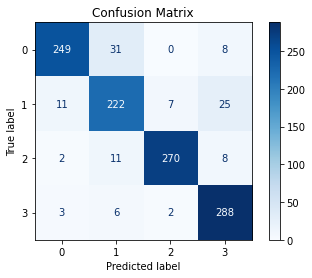

              precision    recall  f1-score   support

      glioma       0.94      0.86      0.90       288
  meningioma       0.82      0.84      0.83       265
     notumor       0.97      0.93      0.95       291
   pituitary       0.88      0.96      0.92       299

    accuracy                           0.90      1143
   macro avg       0.90      0.90      0.90      1143
weighted avg       0.90      0.90      0.90      1143

Precision: 0.90
Recall: 0.90
F1 Score: 0.90


In [14]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, f1_score

# After evaluating the CNN model on the test set
y_pred = cnn_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Display the confusion matrix
ConfusionMatrixDisplay(confusion_matrix=cm).plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

# Generate a classification report
report = classification_report(y_test, y_pred_classes, target_names=os.listdir(path))
print(report)

# Save classification report to a text file
with open("classification_report.txt", "w") as f:
    f.write(report)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred_classes, average='weighted')
recall = recall_score(y_test, y_pred_classes, average='weighted')
f1 = f1_score(y_test, y_pred_classes, average='weighted')

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


In [15]:
pwd

'/home/sulman/Downloads'